## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Importing the first dataset

In [11]:
df = pd.read_csv('/Users/vanessaveiga/Downloads/avocados-us-2015-1018.csv')
# taking out the first column which is just index numbers.
df = df.iloc[:,1:]
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Exploratory Data Analysis

Checking the number of rows and columns

In [12]:
df.shape

(18249, 13)

Checking unique values for type and region

In [9]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [26]:
# Checking how many of each city and simultaneously find out all the cities listed.
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Checking description for region (categorical variable)

In [30]:
df.region.describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

Checking description for Average Price (continous variable)

In [11]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

## Filtering to keep the 3 cities

In [31]:
df1 = df[df.region.isin(['SouthCarolina', 'Boston', 'Chicago'])]
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
208,12/27/2015,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
209,12/20/2015,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
210,12/13/2015,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
211,12/6/2015,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
212,11/29/2015,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston


Checking to see if we have only 3 cities now under unique and the value counts.

In [33]:
df1.region.describe()

count       1014
unique         3
top       Boston
freq         338
Name: region, dtype: object

In [39]:
df1.region.value_counts()

Boston           338
Chicago          338
SouthCarolina    338
Name: region, dtype: int64

## Data Wrangling

#### Recoding variables.
This will include type and region since they are objects.

First, let's recode type

In [35]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
df1['typeR'] = df1['type'].apply(recode)
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,regionR,typeR
208,12/27/2015,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston,1,0
209,12/20/2015,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston,1,0
210,12/13/2015,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston,1,0
211,12/6/2015,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston,1,0
212,11/29/2015,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston,1,0


Now recoding the cities

In [36]:
def recode(series):
    if series == 'SouthCarolina':
        return 0
    if series == 'Boston':
        return 1
    if series == 'Chicago':
        return 2
    
df1['regionR'] = df1['region'].apply(recode)
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,regionR,typeR
208,12/27/2015,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston,1,0
209,12/20/2015,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston,1,0
210,12/13/2015,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston,1,0
211,12/6/2015,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston,1,0
212,11/29/2015,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston,1,0


Checking the unique values.

In [22]:
df1.regionR.unique()

array([0, 2, 1])

In [21]:
df1.typeR.unique()

array([0, 1])

## Testing for assumptions

* Normality
* Homogeneity of Variance
* Sample size > 20
* Independence
* Sphercity

We know sample size is greater than 20, Independence is there since the cities are not related. Sphercity is when comparing for a time series, so we don't have to worry about that.

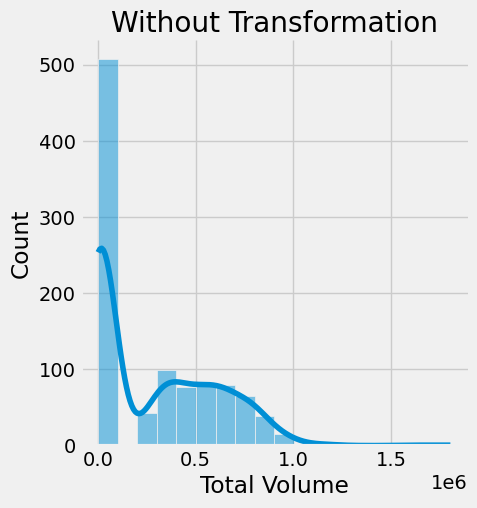

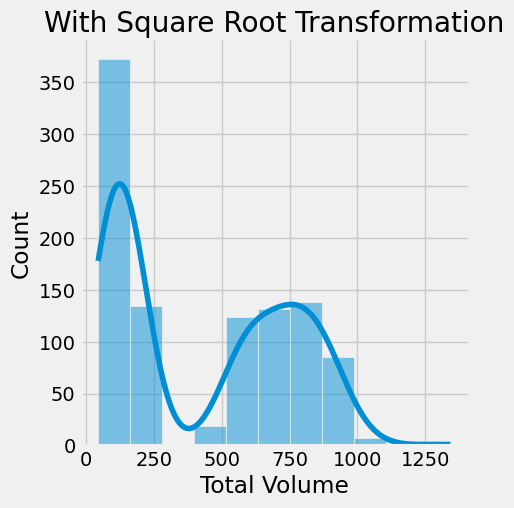

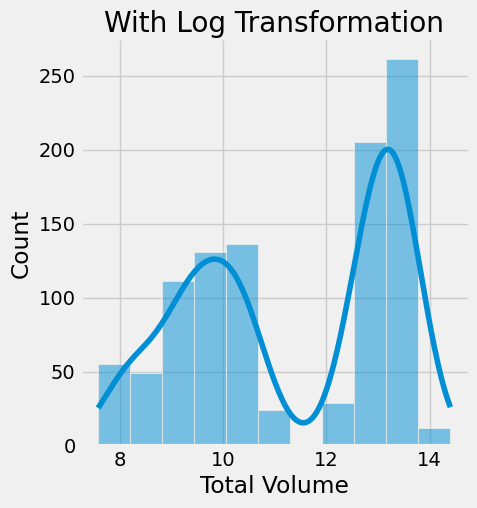

In [41]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(df1['Total Volume'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(df1['Total Volume']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(df1['Total Volume']), kde = True).set(title='With Log Transformation')

The log transformation looks more normal but it does violate the assumption since there is clearly 2 bell shaped curves. However, being aware of this violation, we will continue to move forward with the log function.

In [43]:
#perform log transformation
df1['Total Volume_log'] = np.log(df1['Total Volume'])

In [44]:
bartlett(df1["Total Volume_log"], df1["regionR"])

BartlettResult(statistic=681.0293960138611, pvalue=3.990868355374021e-150)

The p value is very small and violates this assumption. Will continue.

In [45]:
#without the log information bartlett's test to compare.
bartlett(df1["Total Volume"], df1["regionR"])

BartlettResult(statistic=24596.210152677148, pvalue=0.0)

The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05
The p vaue associated with the test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance, however we know that each city doesn't impact the other cities. So, we will move ahead.

In [47]:
f_oneway(
    df["Total Volume"][df["region"]=='Chicago'],
    df["Total Volume"][df["region"]=='Boston'],
    df["Total Volume"][df["region"]=='SouthCarolina']
)

F_onewayResult(statistic=45.17027583096945, pvalue=1.6230242326268377e-19)

Since the p value is less than .05, there is a significant difference in between these three categories.

Now, we will do postHoc with and without the log transformation.

In [48]:
postHocResults = MultiComparison(df1["Total Volume_log"], df1["region"]).tukeyhsd()
print(postHocResults)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------
 Boston       Chicago    0.655    0.0  0.3126  0.9974   True
 Boston SouthCarolina  -0.3986 0.0176 -0.7409 -0.0562   True
Chicago SouthCarolina  -1.0536    0.0 -1.3959 -0.7112   True
------------------------------------------------------------


In [49]:
postHocResults = MultiComparison(df1["Total Volume"], df1["region"]).tukeyhsd()
print(postHocResults)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
 group1     group2      meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------
 Boston       Chicago  107776.1943   0.0   54479.2623  161073.1264   True
 Boston SouthCarolina -108047.9643   0.0 -161344.8964  -54751.0322   True
Chicago SouthCarolina -215824.1586   0.0 -269121.0907 -162527.2265   True
-------------------------------------------------------------------------


The output provides the mean difference in the number of reviews per comparison, plus the confidence interval, and whether or not you can reject the null hypothesis. In this case we will reject the null hypothesis.

There is a significant difference between th consumption of Avocados between all 3 of the Cities.

## Determine Means and Draw Conclusions

In [50]:
df2 = df1[['region', 'Total Volume']]

df2.groupby('region').mean()

,Total Volume
region,
Boston,287792.854527
Chicago,395569.048846
SouthCarolina,179744.890237


Chicago consumes the most avocados, more than twice what South Carolina consumes, and 1/4 more than what Boston consumes.

## Linear Regression

Turning the date into datetime

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
df_date = df[['Date','region', 'AveragePrice']]
df_date.head()

,Date,region,AveragePrice
0,12/27/2015,Albany,1.33
1,12/20/2015,Albany,1.35
2,12/13/2015,Albany,0.93
3,12/6/2015,Albany,1.08
4,11/29/2015,Albany,1.28


In [22]:
df_date.dtypes

Date             object
region           object
AveragePrice    float64
dtype: object

In [23]:
df_date['Date'] = pd.to_datetime(df_date['Date'], format='%m/%d/%Y')

In [24]:
df_date

,Date,region,AveragePrice
0,2015-12-27,Albany,1.33
1,2015-12-20,Albany,1.35
2,2015-12-13,Albany,0.93
3,2015-12-06,Albany,1.08
4,2015-11-29,Albany,1.28
...,...,...,...
18244,2018-02-04,WestTexNewMexico,1.63
18245,2018-01-28,WestTexNewMexico,1.71
18246,2018-01-21,WestTexNewMexico,1.87
18247,2018-01-14,WestTexNewMexico,1.93


In [25]:
df_date.dtypes

Date            datetime64[ns]
region                  object
AveragePrice           float64
dtype: object

In [26]:
df_date.head()

,Date,region,AveragePrice
0,2015-12-27,Albany,1.33
1,2015-12-20,Albany,1.35
2,2015-12-13,Albany,0.93
3,2015-12-06,Albany,1.08
4,2015-11-29,Albany,1.28


Saving the data

In [33]:
df_date.to_csv('../Data/avocados1.csv', index=False)

In [34]:
ls ../Data

ava.csv        avocados1.csv


selecting only the 3 cities

In [35]:
df_date1 = df_date[df_date.region.isin(['SouthCarolina', 'Boston', 'Chicago'])]

In [36]:
df_date1.head()

,Date,region,AveragePrice
208,2015-12-27,Boston,1.13
209,2015-12-20,Boston,1.07
210,2015-12-13,Boston,1.01
211,2015-12-06,Boston,1.02
212,2015-11-29,Boston,1.19


Reading the previous data I was working on

In [50]:
data = pd.read_csv('../Data/ava.csv')

In [51]:
data['Date_object'] = pd.to_datetime(data['Date_object'])

In [52]:
data['Year'] = data['Date_object'].dt.year

In [53]:
result = data.groupby(['region', 'Year'])['AveragePrice'].mean()

Turning back into dataframe

In [54]:
result_df = result.reset_index()

In [55]:
result_df.to_csv('../Data/result.csv', index=False)

In [77]:
result_df1 = result_df[result_df.region.isin(['SouthCarolina', 'Boston', 'Chicago'])]

In [78]:
result_df1

,region,Year,AveragePrice
16,Boston,2015,1.473558
17,Boston,2016,1.426154
18,Boston,2017,1.679528
19,Boston,2018,1.576667
32,Chicago,2015,1.404038
33,Chicago,2016,1.547308
34,Chicago,2017,1.714811
35,Chicago,2018,1.561667
176,SouthCarolina,2015,1.454712
177,SouthCarolina,2016,1.305000


In [79]:
# Get unique regions
regions = result_df1['region'].unique()

In [71]:
# Initialize an empty DataFrame to store predictions
predictions = pd.DataFrame(columns=['Region', 'Year', 'Predicted_Price'])

In [81]:
# Iterate through each region
for region in regions:
    # Filter data for the current region
    region_data = result_df1[result_df1['region'] == region]

    # Prepare the feature matrix (X) and target vector (y)
    X = region_data[['Year']]
    y = region_data['AveragePrice']

    # Split the data into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the prices for the testing set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error and R-squared score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{region} - Mean squared error: {mse:.2f}, R-squared: {r2:.2f}")

    # Predict the price for the following year
    next_year = np.array([X['Year'].max() + 1]).reshape(-1, 1)
    next_year_price = model.predict(next_year)

    # Add the prediction to the predictions DataFrame
    predictions = predictions.append({
        'Region': region,
        'Year': next_year[0][0],
        'Predicted_Price': next_year_price[0]
    }, ignore_index=True)

# Save the predictions to a new CSV file

print(predictions)

Boston - Mean squared error: 0.03, R-squared: -4.74
Chicago - Mean squared error: 0.05, R-squared: -923.81
SouthCarolina - Mean squared error: 0.04, R-squared: -112.83
          Region  Year  Predicted_Price
0         Boston  2019         1.885499
1        Chicago  2019         2.025584
2  SouthCarolina  2019         1.504911


In [83]:
predictions.to_csv('../Data/predictions.csv', index=False)